<a href="https://colab.research.google.com/github/wazs555/Data_mining_project/blob/master/data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data 불러오기


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data = pd.read_csv('/content/drive/My Drive/데이터마이닝/diabetes.csv')
data.describe().T # data에 대해 boxplot 형식의 data.describe생성. 
''' 
1. Pregnancies : 임신 횟수
2. Glucose : 포도당 부하 수치
3. Blood Pressure : 혈압(수축기 혈압 - 이완기 혈압)
4. SkinThickness : 팔 삼두근 뒤 쪽의 피하지방 측정값
5. Insuline : 혈청 인슐린
6. BMI
7. Diabetes Pedigree Function : 당뇨 내력 가중치
8. Age : 나이
9. Outcome : 결과 값, Label
'''
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [0]:
print(data.values[:,-1]) #label에서 양성인 사람과 음성인 사람의 수 check
cnt_1 = 0
cnt_0 = 0
for i in data.values[:,-1]:
  if i == 1:
    cnt_1 = cnt_1 + 1
  else:
    cnt_0 = cnt_0 + 1
print('당뇨에 양성인 사람의 수', cnt_1, '명', cnt_1/2000*100, '%')
print('당뇨에 음성인 사람의 수', cnt_0, '명', cnt_0/2000*100, '%')

[1. 0. 1. ... 0. 1. 0.]
당뇨에 양성인 사람의 수 684 명 34.2 %
당뇨에 음성인 사람의 수 1316 명 65.8 %


In [0]:
data['Insulin']
data_2 = 

,BloodPressure,SkinThickness
0,62,35
1,82,31
2,0,0
3,68,42
4,62,41
...,...,...
1995,64,24
1996,72,42
1997,78,0
1998,110,46


# Data Preproceesing

In [0]:
print(data.isnull().sum()) # data에 NULL값은 존재하지않는다.
print('\n', data.isna().sum())#data에 na값은 존재하지않는다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [0]:
#Data Preprocessing
''' Data에 대한 전처리를 진행하려 하였음 - > null값이나 na값은 존재하지않고 모든 값들이 숫자로 존재
사람에 대한 정보라 pregnancies가 17이 나오는 그런 상황을 전처리하기 뭐한 상태'''

' Data에 대한 전처리를 진행하려 하였음 - > null값이나 na값은 존재하지않고 모든 값들이 숫자로 존재\n사람에 대한 정보라 pregnancies가 17이 나오는 그런 상황을 전처리하기 뭐한 상태'

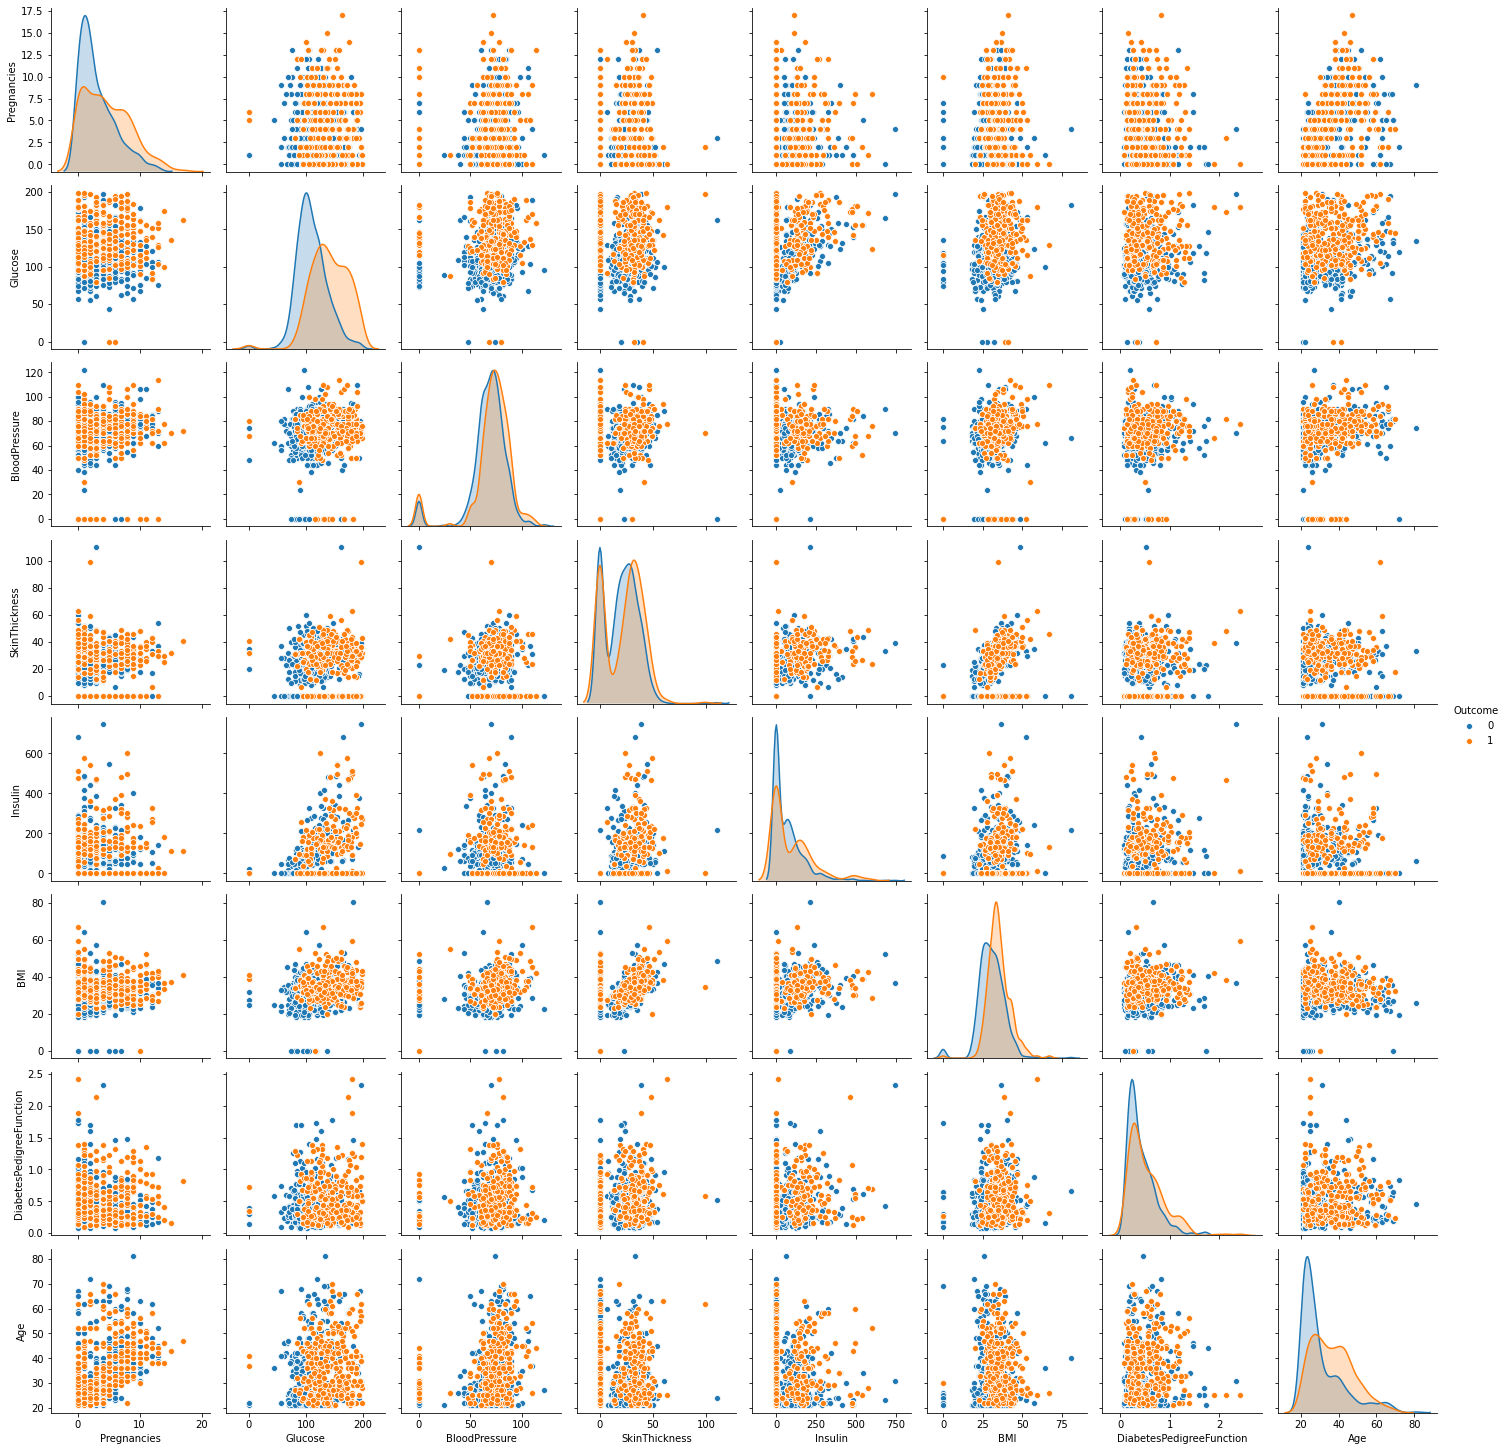

In [0]:
aa=sns.pairplot(data,hue='Outcome')

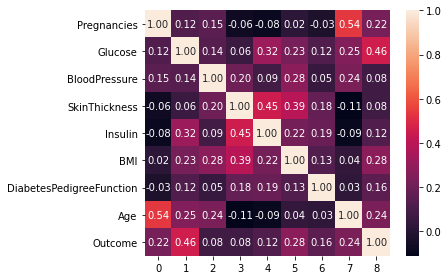

'상관계수가 높은 순으로 봤을 때 feature 기준 1. Age, Pregnancies : 어느정도 이해가 감. \n 위에서 scatterplot을 찍어봤을 때는 SkinThickness와 BMI가 더 관계 있어보였지만 실제로 상관계수는 SkinThickness와 insulin의 상관계수가 더 높았다.'

In [0]:
#Pearson 상관계수를 구해서 데이터를 시각화. 상관관계를 갖는 것을 대략적으로 분석해보려함
cm = np.corrcoef(data.values.T)
#sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 15}, yticklabels=columns, xticklabels=columns)
sns.heatmap(cm, fmt = '.2f', cbar = True, annot = True, square=True, yticklabels=data.columns)
plt.tight_layout()#자동으로 레이아웃을 맞춰주는 함수.
plt.show()

'''상관계수가 높은 순으로 봤을 때 feature 기준 1. Age, Pregnancies : 어느정도 이해가 감. 
 위에서 scatterplot을 찍어봤을 때는 SkinThickness와 BMI가 더 관계 있어보였지만 실제로 상관계수는 SkinThickness와 insulin의 상관계수가 더 높았다.'''

In [0]:
data[data['BloodPressure'] > 120] #Insulin이 0이라 해도 Outcome이 0인 경우 존재, 단순히 아웃라이어라고 가정할 수 없음.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
1264,1,96,122,0,0,22.4,0.207,27,0
1927,1,96,122,0,0,22.4,0.207,27,0


In [0]:
from sklearn.model_selection import train_test_split #trainData와 testData 나누기.
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state = 5)

print(train_X.describe().T)
print(test_X.describe().T)

                           count       mean        std  ...     50%     75%     max
Pregnancies               1600.0   3.680625   3.301770  ...   3.000   6.000   17.00
Glucose                   1600.0   0.082500   1.000034  ...   0.000   0.000   21.00
BloodPressure             1600.0  68.818125  19.309663  ...  72.000  78.000  122.00
SkinThickness             1600.0  20.811250  15.863177  ...  23.000  32.000  110.00
Insulin                   1600.0   0.075625   1.004010  ...   0.000   0.000   20.00
BMI                       1600.0  32.088250   8.302872  ...  32.000  36.800   80.60
DiabetesPedigreeFunction  1600.0   0.473362   0.326532  ...   0.377   0.629    2.42
Age                       1600.0  32.923750  11.614527  ...  29.000  40.000   81.00

[8 rows x 8 columns]
                          count       mean        std  ...     50%       75%     max
Pregnancies               400.0   3.795000   3.325752  ...   3.000   6.00000   17.00
Glucose                   400.0   0.105000   0.82806

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth = 5, random_state=0) #max_depth = 17부터 trainset에서는 accuracy 1, testset에서는 accuracy 0.978 // overfitting이 심하게 됨.
tree.fit(train_X, train_Y)

score_train = tree.score(train_X, train_Y)
score_test = tree.score(test_X, test_Y)

print('train_accuracy :','{:.3f}'.format(score_train))
print('test_accuracy :','{:.3f}'.format(score_test))


train_accuracy : 0.776
test_accuracy : 0.770


In [0]:
import graphviz #아ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ 모르겠다ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'tree.dot')
with open('tree.dot') as file_reader:

    dot_graph = file_reader.read()



dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

dot.render(filename='tree.png') # png로 저장

'tree.png.pdf'

In [0]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(train_X, train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred = clf.predict(test_X)

accuracy = sum(test_Y == pred) / len(pred)
accuracy

0.695